#### Modelling Taiwanese credit card defaults

In [20]:
# dependencies
!pip install -r requirements.txt

In [63]:
# libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [22]:
# fetch data from previous dir
load = pd.read_excel('../data/defaults.xls')

In [23]:
# change dataset into pandas dataframe
df = pd.DataFrame(load)

In [24]:
# unpack the dataset
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [25]:
# unpack the dataset
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [26]:
# size of the data
df.shape

(30001, 25)

In [27]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### We can remove the unnecessary columns/rows and unmamed features

In [28]:
# remove the descriptive row 0 
df = df.drop([0], axis= 0)

In [29]:
df = df.drop(['Unnamed: 0'], axis= 1)

In [30]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [31]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [32]:
df.dtypes

X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
X11    object
X12    object
X13    object
X14    object
X15    object
X16    object
X17    object
X18    object
X19    object
X20    object
X21    object
X22    object
X23    object
Y      object
dtype: object

#### We can convert the dataframe to interger since it appears to be object - which makes it difficult for machine to learn 

In [33]:
# convert to integer
df = df.astype(int)

In [34]:
df.dtypes

X1     int32
X2     int32
X3     int32
X4     int32
X5     int32
X6     int32
X7     int32
X8     int32
X9     int32
X10    int32
X11    int32
X12    int32
X13    int32
X14    int32
X15    int32
X16    int32
X17    int32
X18    int32
X19    int32
X20    int32
X21    int32
X22    int32
X23    int32
Y      int32
dtype: object

In [35]:
df['Y']

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 30000, dtype: int32

In [36]:
df['Y'].unique()

array([1, 0])

In [37]:
df['Y'].value_counts()     # this feature will be used later for classification

Y
0    23364
1     6636
Name: count, dtype: int64

#### The attribute `Y` seems to be a binary feature (0 and 1), this might be our target for this project. 
#### From the description.md, `y` -- `default payment next month`.

In [38]:
# overall summary on intergers
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Check missing values

In [39]:
# NaN
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [40]:
df.isna().sum().sum()

0

#### No missing values

#### Visualizing data

#### 1. plot histogram

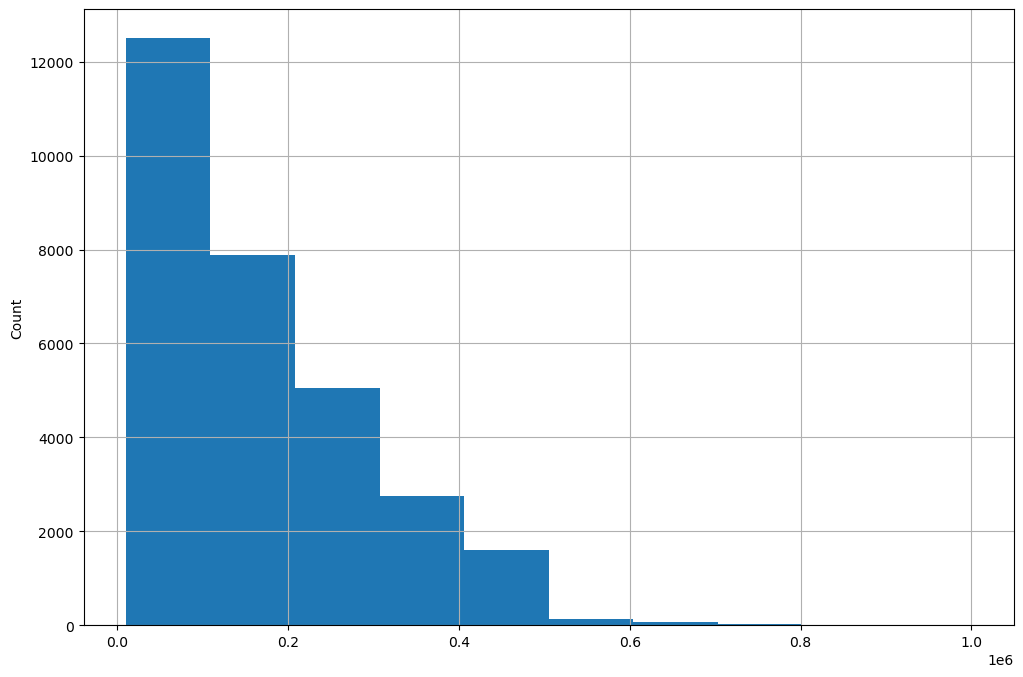

In [41]:
# hist plot
plt.figure(figsize= (12, 8))
plt.hist(df['X1'])
plt.ylabel('Count')
plt.xlabel('')
plt.grid()

plt.show()

#### 2. Relationship between `X2 == SEX` and `Y == default`

#### for male - 1 and for female - 2 on the x_axis

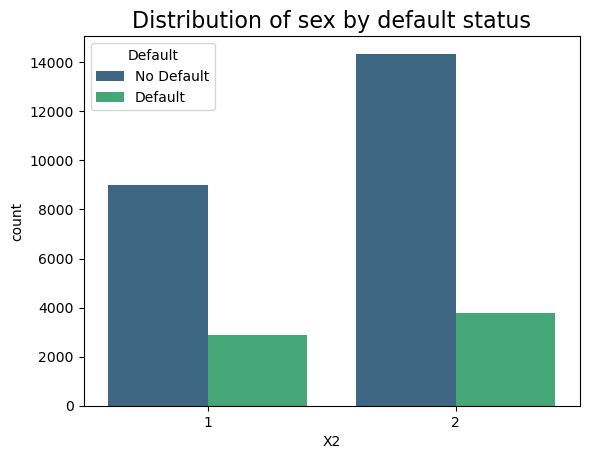

In [42]:
# bar chat
sns.countplot(data = df, x= df['X2'], hue= df['Y'], palette= 'viridis')
plt.title('Distribution of sex by default status', fontsize= 16)


plt.legend(title= 'Default', labels= ['No Default', 'Default'], fontsize= 10)

plt.show()

#### 3. Default rate vs Education Level

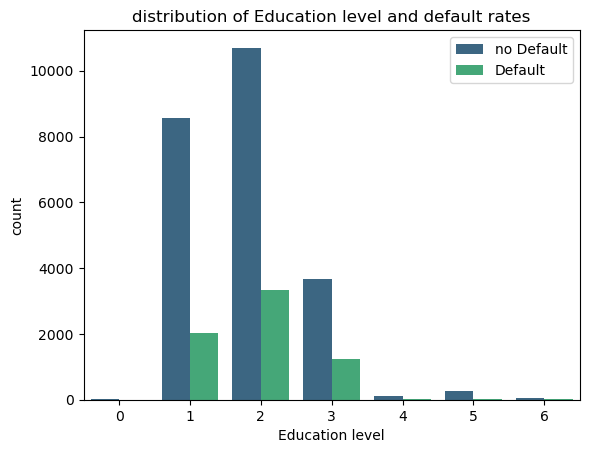

In [43]:
# bar chat

sns.countplot(data= df, x= df['X3'], hue= df['Y'], palette= 'viridis')
plt.title('distribution of Education level and default rates')
plt.xlabel('Education level')

plt.legend(labels= ['no Default', 'Default'])
plt.show()

#### 4. Default rate and age

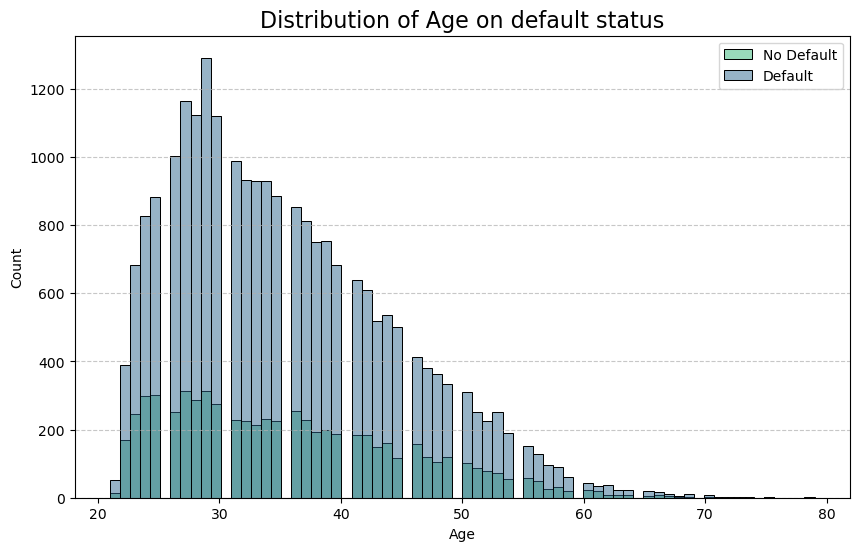

In [44]:
# plot
plt.figure(figsize= (10, 6))
sns.histplot(data= df, x= df['X5'], hue= df['Y'], palette= 'viridis')
plt.title('Distribution of Age on default status', fontsize= 16)
plt.xlabel('Age')

plt.legend(labels= ['No Default', 'Default'], fontsize= 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5. Financial attributes

In [45]:
# X1 limit balance vs default rate

In [46]:
# 

In [47]:
#

#### Procesing

In [48]:
# data split
Y = df['Y']
X = df.drop('Y', axis= 1)

In [49]:
# Where Y is the target
Y.shape

(30000,)

In [50]:
# X is the input
X.shape

(30000, 23)

#### Data split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 55)

In [57]:
Y_train

2939     0
18757    0
23048    0
24583    0
13975    0
        ..
16254    0
17353    0
28968    0
4763     1
29134    0
Name: Y, Length: 24000, dtype: int32

In [52]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
2939,150000,1,2,1,31,2,2,0,0,0,...,134757,85874,84665,78130,57,6203,2819,3109,2842,3024
18757,160000,2,2,2,30,0,0,2,-1,0,...,4500,32468,22485,119853,2250,0,32468,2000,104465,4602
23048,180000,2,1,2,33,1,-1,-1,-1,-2,...,7683,0,0,9500,4163,7683,200,0,9500,0
24583,170000,1,2,1,33,-1,2,2,-1,-1,...,0,2038,0,0,0,0,2038,0,0,0
13975,120000,2,3,1,45,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16254,260000,2,2,1,38,0,0,0,0,0,...,190339,186688,177785,165789,8357,7200,6500,6000,6000,6400
17353,50000,2,2,2,46,0,0,0,0,0,...,44899,46346,47273,48357,2100,2100,2500,2000,2000,3000
28968,500000,2,5,1,32,-1,-1,-1,-1,0,...,5578,57722,55468,55026,6081,5588,58476,1910,1974,2254
4763,30000,2,2,1,22,2,0,0,0,0,...,28067,28334,28984,14769,2000,1500,1000,800,728,1000


In [53]:
# scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [54]:
# model 
models = {
         'Logistic regression model': LogisticRegression(max_iter= 1000),
         'Random forest model': RandomForestClassifier(),
         'Decission Tree model': DecisionTreeClassifier()
         

}

In [55]:
# train
for name, model in models.items():
    try:
        model.fit(X_train, Y_train)
        print(f'The {name} trained successfully')
    except Exception as e:
        print(f'The {name} failed to train successfully: {e}')        

c:\Users\topol\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Logistic regression model trained successfully
The Random forest model trained successfully
The Decission Tree model trained successfully


###

#### Perfomance

In [56]:
# Predict and evaluate
for name, model in models.items():
    try:
        Y_pred = model.predict(X_test)
        print(f'Results for {name}:\n')
        print(classification_report(Y_test, Y_pred))
    except Exception as e:
        print(f'The {name} failed to evaluate: {e}')

Results for Logistic regression model:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4691
           1       0.73      0.08      0.15      1309

    accuracy                           0.79      6000
   macro avg       0.76      0.54      0.51      6000
weighted avg       0.78      0.79      0.72      6000

Results for Random forest model:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4691
           1       0.66      0.38      0.48      1309

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000

Results for Decission Tree model:

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4691
           1       0.39      0.43      0.41      1309

    accuracy                           0.73      6000
   macro avg       

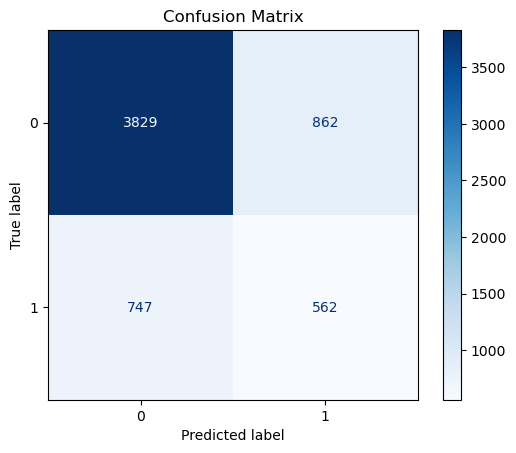

In [69]:
# confusion matrix
conf = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(conf)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()

In [ ]:
## Accuracy 
